In [11]:
%config InlineBackend.figure_format="retina"
%config Completer.use_jedi = False

In [37]:
import sys
import numpy as np

sys.path.append('/data/apcooper/sfw/hdf5_tools/py/')
import hdf5_tools.hdf5_tools as hdf5
import matplotlib.pyplot as pl

In [42]:
!h5ls './output_tree_basic.001.hdf5/OutputTimes'

DeltaCrit                Dataset {128}
ExpansionFactor          Dataset {128}
Redshift                 Dataset {128}


In [52]:
# The reversal is so we can index this with the largest snapnumber giving the smallest redshift
snap_to_zred = hdf5.read_hdf5_data('./output_tree_basic.001.hdf5','/OutputTimes/Redshift')[::-1]

In [13]:
tree_off = hdf5.read_hdf5_data('./output_tree_basic.001.hdf5','/TreeTable/StartOffset')
tree_len = hdf5.read_hdf5_data('./output_tree_basic.001.hdf5','/TreeTable/Length')

In [28]:
halo_snap = hdf5.read_hdf5_data('./output_tree_basic.001.hdf5','/TreeHalos/SnapNum')
halo_mass = hdf5.read_hdf5_data('./output_tree_basic.001.hdf5','/TreeHalos/SubhaloMass')
halo_mpro = hdf5.read_hdf5_data('./output_tree_basic.001.hdf5','/TreeHalos/TreeMainProgenitor')

In [73]:
tree_off = np.flatnonzero(halo_mass > 0.99e12)

In [90]:
main_branch_mass = list()
main_branch_snap = list()

for itree,root_node_idx in enumerate(tree_off):
    # Start a new main branch
    main_branch_mass.append(list())
    main_branch_snap.append(list())
    
    # Loop over the main branch from the root node
    idx = root_node_idx
    while halo_mpro[idx] >= 0:
        main_branch_mass[itree].append(halo_mass[idx])
        main_branch_snap[itree].append(halo_snap[idx])
        idx = root_node_idx + halo_mpro[idx]

for i in range(0,len(tree_off)):
    main_branch_mass[i] = np.array(main_branch_mass[i])
    main_branch_snap[i] = np.array(main_branch_snap[i])

In [86]:
main_branch_mass[0][0:4]

array([1.0000000e+12, 9.5651725e+11, 9.0365264e+11, 8.5863334e+11],
      dtype=float32)

In [91]:
main_branch_mass[1][0:4]

array([1.0000000e+12, 9.4885924e+11, 8.6369429e+11, 8.2197040e+11],
      dtype=float32)

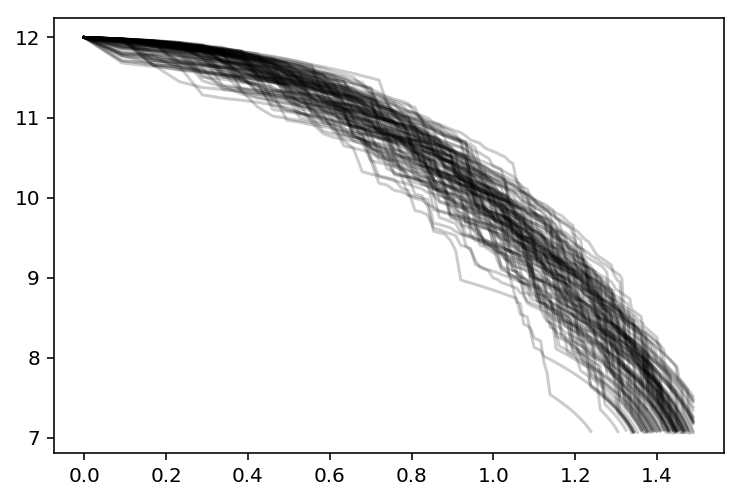

In [117]:
for i in range(0,len(tree_off)):
    snap = main_branch_snap[i]
    mass = main_branch_mass[i]
    pl.plot(np.log10(1+snap_to_zred[snap]),np.log10(mass),alpha=0.2,c='k')

In [112]:
log_mass_bins = np.arange(6,13,0.1)

cmf_all_snap = dict()
for target_snap in range(30,127):
    cmf_all_snap[target_snap] = list()
    
for itree in range(len(tree_off)):
    l = tree_len[itree]
    o = tree_off[itree]

    for target_snap in range(30,127):
        this_tree_at_target_snap = halo_snap[o:o+l] == target_snap
    
        h,b = np.histogram(np.log10(halo_mass[o:o+l][this_tree_at_target_snap]),bins=log_mass_bins)
        cmf_all_snap[target_snap].append(h)

In [105]:
cmfs = np.array(cmf)

In [113]:
med_cmf = dict()
for target_snap in range(30,127):
    med_cmf[target_snap] = np.median(np.array(cmf_all_snap[target_snap]),axis=0)

/cluster/home/apcooper/.conda/envs/mypy/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


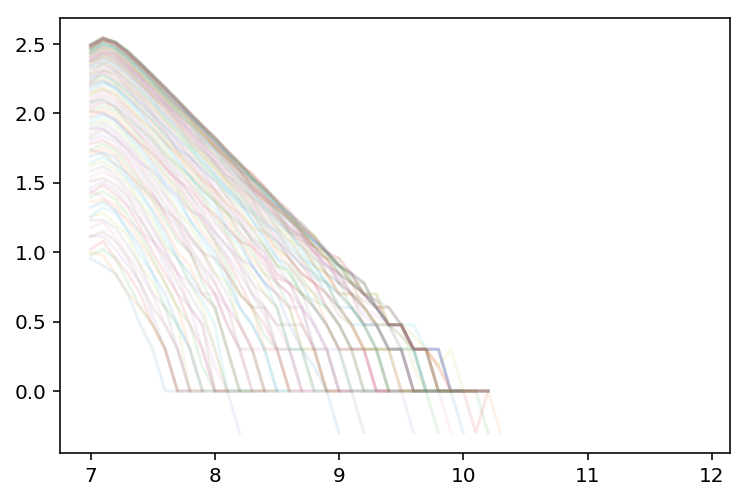

In [120]:
for target_snap in range(30,127):
    pl.plot(log_mass_bins[:-1],np.log10(med_cmf[target_snap]),alpha=0.1)